# Step 1: Importing the libraries needed

Let us first import NumPy, Pandas and other related libraries read the telecom dataset

In [3]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

import chardet

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

from datetime import date,datetime

# Import SciKit libraries related to LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from scipy import stats



### Helper Methods

In [4]:
def check_missing_value(data):
    """
    Function to check the total number of NAN values and the percentage of NA values in each column.
    The column names are listed as the index of the dataframe
    
    Input Parameters
    ----------
    data: dataframe
    
    Output Parameters
    ----------
    data: dataframe with null values report 
    
    """
    # pandas series denoting features and the sum of their null values
    total_nan = data.isnull().sum()
    
    # Sort the values in descending order 
    total_values = total_nan.sort_values(ascending=False)
    
    # Compute the percentage of missing value
    percent_nan = ( ((total_nan / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NAN = pd.concat([total_values, percent_nan], axis=1, keys=['Number of NAN', '% NAN'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NAN = df_NAN[ (df_NAN.T != 0).any() ]
    
    return df_NAN

In [5]:
def plot_bar_graph(data, graph_title, x_axis, y_axis, x_axis_label, y_axis_label,fig_size=None):
   
    if fig_size == None:
        plt.figure(figsize=(16,6))
    else:
        plt.figure(figsize=fig_size)
        
    #bar_plot = sns.barplot(x = 'tenure_bins', y='churn', palette='Set1', data = data)
    bar_plot = sns.barplot(x = x_axis, y=y_axis, palette='Set1', data = data)

    # Calculate the values and print it on top of each bar
    for bar in bar_plot.patches:
        bar_plot.annotate(format(bar.get_height(), '.2f'),
                          (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                          ha='left', va='center',
                          size=10, xytext=(0, 8),
                          textcoords='offset points')

    # Print the title, labels respectively 
    
    plt.title(graph_title, fontdict={'fontsize': 10})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

# Step 2: Data Sourcing









## Check the encoding and load the data


In [6]:
# Checking the encoding of the loan.csv file
with open("telecom_churn_data.csv", "rb") as rawdata:
    telecom_df = chardet.detect(rawdata.read(2000))

telecom_df

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

## Check for the information about the data

In [307]:
# read the dataset
telecom_df = pd.read_csv("telecom_churn_data.csv", sep=",", encoding="ISO-8859-1", header=0)
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [308]:
# Checking the informations regarding the dataset
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [309]:
telecom_df.shape

(99999, 226)

In [310]:
# Store all the object is one dataframe
telecom_object = telecom_df.select_dtypes(include=['object'])

# all numeric (float and int) variables in the dataset
telecom_numeric = telecom_df.select_dtypes(include=['float64', 'int64'])

# all dates variable in one dataframe
telecom_date = telecom_df.select_dtypes(include=['datetime'])


In [311]:
telecom_object.shape, telecom_numeric.shape, telecom_date.shape

((99999, 12), (99999, 214), (99999, 0))

## Load the data dictionary

In [312]:
# Importing the excel file of the dictionary.
telecom_data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [313]:
# Displaying the dictionary items
telecom_data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


## Statistical Analysis

In [314]:
# Statistical analysis of the numercial features
telecom_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [315]:
#Remove the columns where the sum is 0 
counter = 0
print (telecom_df.shape)
for i in telecom_numeric.columns:
    is_zero = telecom_numeric[i].sum()
    if is_zero == 0:
        print (f"{i} -> {is_zero}")
        counter +=1 
        telecom_df = telecom_df.drop([i], axis=1)
print (counter)
print (telecom_df.shape)

(99999, 226)
loc_og_t2o_mou -> 0.0
std_og_t2o_mou -> 0.0
loc_ic_t2o_mou -> 0.0
std_og_t2c_mou_6 -> 0.0
std_og_t2c_mou_7 -> 0.0
std_og_t2c_mou_8 -> 0.0
std_og_t2c_mou_9 -> 0.0
std_ic_t2o_mou_6 -> 0.0
std_ic_t2o_mou_7 -> 0.0
std_ic_t2o_mou_8 -> 0.0
std_ic_t2o_mou_9 -> 0.0
11
(99999, 215)


In [316]:
# Remove the columns where the values are unique
counter_1 = 0
print (telecom_df.shape)
for i in telecom_df.columns:
    if telecom_df[i].nunique() == 1:
        print (f"{i}")
        counter_1 +=1 
        telecom_df = telecom_df.drop([i], axis=1)

print (counter_1)
print (telecom_df.shape)

(99999, 215)
circle_id
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
5
(99999, 210)


In [317]:
check_missing_value(telecom_df)

,Number of NAN,% NAN
max_rech_data_6,74846,74.85
fb_user_6,74846,74.85
count_rech_3g_6,74846,74.85
count_rech_2g_6,74846,74.85
night_pck_user_6,74846,74.85
arpu_3g_6,74846,74.85
total_rech_data_6,74846,74.85
av_rech_amt_data_6,74846,74.85
arpu_2g_6,74846,74.85
date_of_last_rech_data_6,74846,74.85


In [318]:
# Store all the object is one dataframe
telecom_object = telecom_df.select_dtypes(include=['object'])

# all numeric (float and int) variables in the dataset
telecom_numeric = telecom_df.select_dtypes(include=['float64', 'int64'])

telecom_date = telecom_df.select_dtypes(include=['datetime'])


In [319]:
telecom_object.shape, telecom_numeric.shape, telecom_date.shape

((99999, 8), (99999, 202), (99999, 0))

In [320]:
telecom_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       98392 non-null  object
 1   date_of_last_rech_7       98232 non-null  object
 2   date_of_last_rech_8       96377 non-null  object
 3   date_of_last_rech_9       95239 non-null  object
 4   date_of_last_rech_data_6  25153 non-null  object
 5   date_of_last_rech_data_7  25571 non-null  object
 6   date_of_last_rech_data_8  26339 non-null  object
 7   date_of_last_rech_data_9  25922 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


As we can see that the columns with datetime values represented as object, they can be converted into datetime format



In [321]:
# selecting all the columns with datetime format
print("\nThese are the columns available with datetime format represented as object\n",telecom_object.columns)

# Converting the selected columns to datetime format
for i in telecom_object.columns:
    telecom_df[i] = pd.to_datetime(telecom_df[i])

# Current dimension of the dataset
telecom_df.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


(99999, 210)

In [322]:
telecom_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       98392 non-null  object
 1   date_of_last_rech_7       98232 non-null  object
 2   date_of_last_rech_8       96377 non-null  object
 3   date_of_last_rech_9       95239 non-null  object
 4   date_of_last_rech_data_6  25153 non-null  object
 5   date_of_last_rech_data_7  25571 non-null  object
 6   date_of_last_rech_data_8  26339 non-null  object
 7   date_of_last_rech_data_9  25922 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [323]:
# confirming the conversion of dtype
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

In [324]:
# Store all the object is one dataframe
telecom_object = telecom_df.select_dtypes(include=['object'])

# all numeric (float and int) variables in the dataset
telecom_numeric = telecom_df.select_dtypes(include=['float64', 'int64'])

telecom_date = telecom_df.select_dtypes(include=['datetime'])

telecom_object.shape, telecom_numeric.shape, telecom_date.shape

((99999, 0), (99999, 202), (99999, 8))

## Step 3: Data cleaning

### Missing Value treatment 
- Based on the data dictionary definition, business understanding
- Since this is based on business understanding we can impute the value and treat the null value and no need to wait to do it post split

#### Lets analyse all recharge related features

In [325]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

# create a list of recharge columns where we will impute missing values with zeroes

telecom_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


#### Observation
- Some recharge columns have minimum value of 1 while some don't, those value with 0 means they have not recharged at all


In [326]:
check_missing_value(telecom_df[recharge_cols])

,Number of NAN,% NAN
total_rech_data_6,74846,74.85
max_rech_data_6,74846,74.85
av_rech_amt_data_6,74846,74.85
total_rech_data_7,74428,74.43
max_rech_data_7,74428,74.43
av_rech_amt_data_7,74428,74.43
total_rech_data_9,74077,74.08
max_rech_data_9,74077,74.08
av_rech_amt_data_9,74077,74.08
total_rech_data_8,73660,73.66


In [327]:
telecom_df[recharge_cols].head(10)

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2.0,3.0,NaN,NaN,154.0,23.0,NaN,NaN,177.0,69.0,NaN
9,NaN,1.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN,154.0,NaN,NaN


In [328]:
telecom_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


In [329]:
telecom_df[['date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7']].head(10)

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7
0,2014-07-16,1.0,252.0
1,2014-07-25,1.0,154.0
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,NaT,NaN,NaN
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,2014-07-31,2.0,154.0
9,2014-07-23,1.0,154.0


##### Observation
- If the date_of_last_rech_data, total_rech_data and the max_rech_data has missing values, then it means customer has not done any recharge for data
- Hence imputing 0 as their values.

#### MVI for the features total_rech_data_*, max_rech_data_* , av_rech_amt_data_* and for month 6,7,8 and 9
- Impute the data with 0


In [330]:
# create a list of recharge columns where we will impute missing values with zeroes
impute_with_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [331]:
check_missing_value(telecom_df[impute_with_zero])

,Number of NAN,% NAN
total_rech_data_6,74846,74.85
av_rech_amt_data_6,74846,74.85
max_rech_data_6,74846,74.85
total_rech_data_7,74428,74.43
av_rech_amt_data_7,74428,74.43
max_rech_data_7,74428,74.43
total_rech_data_9,74077,74.08
av_rech_amt_data_9,74077,74.08
max_rech_data_9,74077,74.08
total_rech_data_8,73660,73.66


In [332]:
# impute missing values with 0
telecom_df[impute_with_zero] = telecom_df[impute_with_zero].apply(lambda x: x.fillna(0))

print(f"The columns {impute_with_zero} are imputed with 0")


The columns ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'] are imputed with 0


In [333]:
# Verify the changes
check_missing_value(telecom_df[impute_with_zero])

,Number of NAN,% NAN


#### MVI for the features total_rech_data_*,  count_rech_*_* for month 6,7,8 and 9


In [334]:
telecom_df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


In [335]:
(telecom_df['count_rech_2g_6'] + telecom_df['count_rech_3g_6']).head(10).fillna(0)

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64

#### Observation
- total_rech_data_6 = count_rech_2g_6 + count_rech_3g_6 
- count_rech_2g_6 and count_rech_3g_6 and total_rech_data_6 are related to each other, and this will be leading to multicollinearity issue 
- we can drop count_rech_2g_6 and count_rech_3g_6 features

In [336]:
count_recharge_cols = ['count_rech_2g_6','count_rech_3g_6', 
                      'count_rech_2g_7','count_rech_3g_7', 
                      'count_rech_2g_8','count_rech_3g_8', 
                      'count_rech_2g_9','count_rech_3g_9']

In [337]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
telecom_df.drop(count_recharge_cols ,axis=1, inplace=True)

print(f"The {count_recharge_cols}columns are dropped as they can be explained from the 'total_rech_data' column")

The ['count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_2g_8', 'count_rech_3g_8', 'count_rech_2g_9', 'count_rech_3g_9']columns are dropped as they can be explained from the 'total_rech_data' column


In [338]:
telecom_df.shape

(99999, 202)

In [339]:
check_missing_value(telecom_df)

,Number of NAN,% NAN
fb_user_6,74846,74.85
arpu_3g_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
night_pck_user_6,74846,74.85
arpu_2g_6,74846,74.85
arpu_2g_7,74428,74.43
night_pck_user_7,74428,74.43
date_of_last_rech_data_7,74428,74.43
fb_user_7,74428,74.43
arpu_3g_7,74428,74.43


### MVI fb_user_*,  night_pck_*  

In [340]:
telecom_df.night_pck_user_7.value_counts()

0.0    24982
1.0    589  
Name: night_pck_user_7, dtype: int64

In [341]:
telecom_df.fb_user_6.value_counts()

1.0    23000
0.0    2153 
Name: fb_user_6, dtype: int64

#### Observation
- night_pck_user_* and fb_user_* can be considered as cateorical columns as they have values 0 and 1. 
- We can do two things to handle the missing values
- 1. Drop the columns
- 2. Impute NaN with new category -1

Choosing to create a new category -1


In [342]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [343]:
telecom_df[cat_cols] = telecom_df[cat_cols].apply(lambda x: x.fillna(-1))
print(f"The {cat_cols} are imputed with new category -1")

The ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'] are imputed with new category -1


In [344]:
check_missing_value(telecom_df)

,Number of NAN,% NAN
arpu_2g_6,74846,74.85
arpu_3g_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
arpu_2g_7,74428,74.43
date_of_last_rech_data_7,74428,74.43
arpu_3g_7,74428,74.43
arpu_3g_9,74077,74.08
arpu_2g_9,74077,74.08
date_of_last_rech_data_9,74077,74.08
arpu_3g_8,73660,73.66


### Missing value treatment for arpu_2g_* 

In [345]:
telecom_df[['arpu_2g_7','arpu_3g_7','arpu_7']].head(10)

,arpu_2g_7,arpu_3g_7,arpu_7
0,212.17,212.17,214.816
1,28.61,0.00,355.074
2,NaN,NaN,189.058
3,NaN,NaN,251.102
4,NaN,NaN,309.876
5,NaN,NaN,58.810
6,NaN,NaN,190.704
7,NaN,NaN,1349.850
8,0.00,0.00,492.223
9,0.00,0.00,247.435


In [346]:
telecom_df[['arpu_2g_6','arpu_3g_6','arpu_6','av_rech_amt_data_6']].head(10)

,arpu_2g_6,arpu_3g_6,arpu_6,av_rech_amt_data_6
0,212.17,212.17,197.385,252.0
1,NaN,NaN,34.047,0.0
2,NaN,NaN,167.690,0.0
3,NaN,NaN,221.338,0.0
4,0.00,0.00,261.636,56.0
5,NaN,NaN,50.258,0.0
6,NaN,NaN,429.023,0.0
7,NaN,NaN,1069.180,0.0
8,NaN,NaN,378.721,0.0
9,NaN,NaN,119.518,0.0


In [347]:
for i in range(6,10):
    print(telecom_df[['arpu_3g_'+str(i),'arpu_2g_'+str(i),'av_rech_amt_data_'+str(i)]].corr())

                    arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6           1.000000   0.932232   0.809695          
arpu_2g_6           0.932232   1.000000   0.834065          
av_rech_amt_data_6  0.809695   0.834065   1.000000          
                    arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7           1.000000   0.930366   0.796131          
arpu_2g_7           0.930366   1.000000   0.815933          
av_rech_amt_data_7  0.796131   0.815933   1.000000          
                    arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8           1.000000   0.924925   0.787165          
arpu_2g_8           0.924925   1.000000   0.805482          
av_rech_amt_data_8  0.787165   0.805482   1.000000          
                    arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9           1.000000   0.852253   0.722932          
arpu_2g_9           0.852253   1.000000   0.817815          
av_rech_amt_data_9  0.722932   0.817815   1.000000          


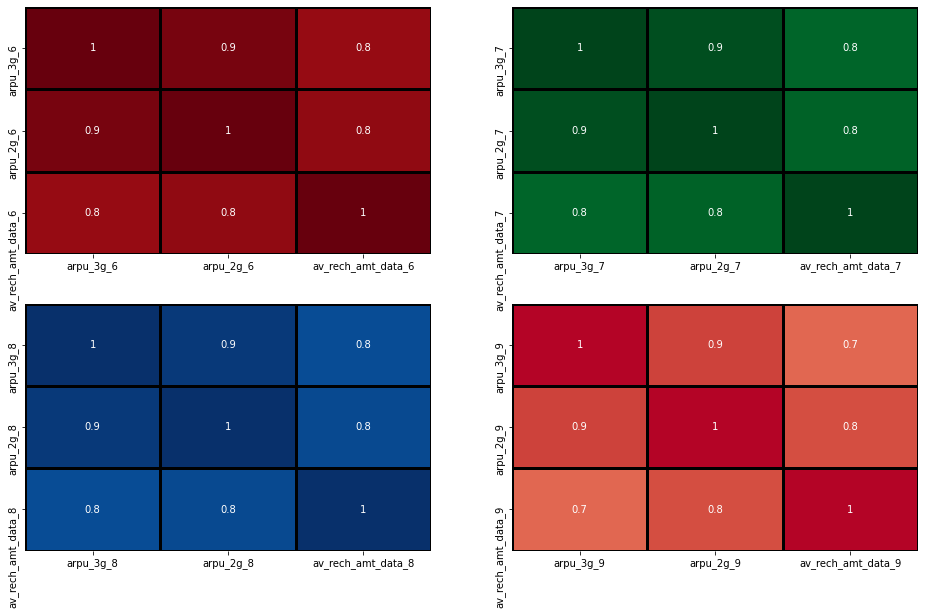

In [348]:
corr_6 = telecom_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr()
corr_7 = telecom_df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr()
corr_8 = telecom_df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr()
corr_9 = telecom_df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr()

plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.heatmap(corr_6, annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black',cmap="Reds",cbar=False)
plt.subplot(2,2,2)
sns.heatmap(corr_7, annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black',cmap="Greens",cbar=False)
plt.subplot(2,2,3)
sns.heatmap(corr_8, annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black',cmap="Blues",cbar=False)
plt.subplot(2,2,4)
sns.heatmap(corr_9, annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black',cmap="coolwarm",cbar=False)

plt.show()

#### Observation
- There is high correlation between arpu_3g_6, arpu_3g_6 and av_rech_amt_data_6 
- So it is safer to drop the attributes arpu_2g_* and arpu_3g_*.



In [349]:
arpu_cols = ['arpu_3g_6','arpu_2g_6',
             'arpu_3g_7','arpu_2g_7',
             'arpu_3g_8','arpu_2g_8',
             'arpu_3g_9','arpu_2g_9']

In [350]:
telecom_df.drop(arpu_cols,axis=1, inplace=True)
print(f"The columns {arpu_cols} are dropped from the dataset due to high correlation between their respective av_rech_amt_data_* feature\n")


The columns ['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8', 'arpu_3g_9', 'arpu_2g_9'] are dropped from the dataset due to high correlation between their respective av_rech_amt_data_* feature



In [351]:
telecom_df.shape

(99999, 194)

In [352]:
check_missing_value(telecom_df)

,Number of NAN,% NAN
date_of_last_rech_data_6,74846,74.85
date_of_last_rech_data_7,74428,74.43
date_of_last_rech_data_9,74077,74.08
date_of_last_rech_data_8,73660,73.66
og_others_9,7745,7.75
std_ic_t2f_mou_9,7745,7.75
loc_og_t2t_mou_9,7745,7.75
std_ic_mou_9,7745,7.75
loc_ic_t2f_mou_9,7745,7.75
loc_og_t2m_mou_9,7745,7.75


### Missing value treatment for date_of_last_rech_data_* 

In [353]:
telecom_df.date_of_last_rech_data_6.value_counts()

2014-06-30    1888
2014-06-29    1651
2014-06-28    1643
2014-06-26    1384
2014-06-27    1333
2014-06-25    1108
2014-06-24    1067
2014-06-22    903 
2014-06-23    893 
2014-06-21    861 
2014-06-17    859 
2014-06-19    813 
2014-06-20    779 
2014-06-18    773 
2014-06-14    739 
2014-06-16    731 
2014-06-12    660 
2014-06-15    656 
2014-06-13    631 
2014-06-11    629 
2014-06-10    626 
2014-06-09    607 
2014-06-06    591 
2014-06-05    584 
2014-06-07    517 
2014-06-08    514 
2014-06-03    495 
2014-06-04    464 
2014-06-02    423 
2014-06-01    331 
Name: date_of_last_rech_data_6, dtype: int64

In [354]:
telecom_df[['date_of_last_rech_data_6','date_of_last_rech_6','max_rech_data_6']].head(20)

,date_of_last_rech_data_6,date_of_last_rech_6,max_rech_data_6
0,2014-06-21,2014-06-21,252.0
1,NaT,2014-06-29,0.0
2,NaT,2014-06-17,0.0
3,NaT,2014-06-28,0.0
4,2014-06-04,2014-06-26,56.0
5,NaT,2014-06-19,0.0
6,NaT,2014-06-28,0.0
7,NaT,2014-06-27,0.0
8,NaT,2014-06-25,0.0
9,NaT,2014-06-29,0.0


#### Observation
- When you look at max_rech_data_6, it is observed that date_of_last_rech_6 captures the information needed for date_of_last_rech_data_6
- Since we have 74% of data we can either impute the value or drop it.
- we will drop the column

In [355]:
last_rech_data = ["date_of_last_rech_data_6","date_of_last_rech_data_7",
                  "date_of_last_rech_data_8","date_of_last_rech_data_9"]

telecom_df.drop(last_rech_data, axis=1, inplace=True)

print(f"\nThe columns {last_rech_data} are dropped as it has no significance\n")



The columns ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'] are dropped as it has no significance



In [356]:
telecom_df.shape

(99999, 190)

In [357]:
check_missing_value(telecom_df)

,Number of NAN,% NAN
loc_ic_t2f_mou_9,7745,7.75
roam_ic_mou_9,7745,7.75
loc_og_t2f_mou_9,7745,7.75
loc_og_t2m_mou_9,7745,7.75
og_others_9,7745,7.75
loc_ic_t2t_mou_9,7745,7.75
isd_og_mou_9,7745,7.75
loc_og_t2t_mou_9,7745,7.75
loc_ic_t2m_mou_9,7745,7.75
std_og_t2t_mou_9,7745,7.75


#### Observation
- There are no high percentage missing values
- We will impute the rest later post data split 

## Step 4: High Value Customer
1. Calculate total data recharge amount 
2. Calculate total recharge amount -> call recharge amount(total_rech_amnt_*) + data recharge amount
3. Calculate average recharge done by customer in the month of June and July
4. Look at 70th percentile recharge amount

<b>Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount</b>

#### Lets us verify if there any missing values in the features which we need to compute high value customers

In [358]:
hvc_cols = [ 'total_rech_data_6','total_rech_data_7',
            'av_rech_amt_data_6', 'av_rech_amt_data_7',
            'total_rech_amt_6','total_rech_amt_7']

check_missing_value(telecom_df[hvc_cols])

,Number of NAN,% NAN


#### Observation
- No missing value found

In [359]:
telecom_df.shape

(99999, 190)

In [360]:
# Calculate total data recharge amount
telecom_df['total_rech_amt_data_6']=telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_rech_amt_data_7']=telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']

# Calculate total recharge amount 
telecom_df['hvc_rech_amt_6'] = telecom_df['total_rech_amt_data_6'] + telecom_df['total_rech_amt_6']
telecom_df['hvc_rech_amt_7'] = telecom_df['total_rech_amt_data_7'] + telecom_df['total_rech_amt_7']

# Calculate average recharge done by customer in the month of June and July(i.e. 6th and 7th month)
telecom_df['hvc_avg_rech_amt_6_7'] = (telecom_df['hvc_rech_amt_6'] + telecom_df['hvc_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company

hvc_cut_off = telecom_df['hvc_avg_rech_amt_6_7'].quantile(0.70)
print(f"\nThe 70th quantile value to determine the High Value Customer is: {hvc_cut_off} \n")

# Filtering the data to the top 30% considered as High Value Customer
telecom_hvc_df = telecom_df[telecom_df['hvc_avg_rech_amt_6_7'] >= hvc_cut_off]



The 70th quantile value to determine the High Value Customer is: 478.0 



In [361]:
telecom_df.shape, telecom_hvc_df.shape

((99999, 195), (30001, 195))

#### Observation
The total number of customers has reduced from 99999 to 30000 who are identified as High value customers

#### We can now delete the variables which we derived to compute the HVC

In [362]:
telecom_hvc_df = telecom_hvc_df.drop(['total_rech_amt_data_6', 'total_rech_amt_data_7',
                                      'hvc_rech_amt_6', 'hvc_rech_amt_7'], axis=1)
telecom_hvc_df.shape


(30001, 191)

In [363]:
# check for missing value
check_missing_value(telecom_hvc_df)

,Number of NAN,% NAN
loc_ic_t2f_mou_9,1901,6.34
roam_ic_mou_9,1901,6.34
loc_og_t2f_mou_9,1901,6.34
loc_og_t2m_mou_9,1901,6.34
og_others_9,1901,6.34
loc_ic_t2t_mou_9,1901,6.34
isd_og_mou_9,1901,6.34
loc_og_t2t_mou_9,1901,6.34
loc_ic_t2m_mou_9,1901,6.34
std_og_t2t_mou_9,1901,6.34


#### Observation
- There are no high percentage missing values
- We will impute the rest later post data split 

In [364]:
# Store all the object is one dataframe
telecom_object = telecom_hvc_df.select_dtypes(include=['object'])

# all numeric (float and int) variables in the dataset
telecom_numeric = telecom_hvc_df.select_dtypes(include=['float64', 'int64'])

# all dates variable in one dataframe
telecom_date = telecom_hvc_df.select_dtypes(include=['datetime'])

telecom_object.shape, telecom_numeric.shape, telecom_date.shape

((30001, 0), (30001, 187), (30001, 4))

## Step 5: Derive Churn
9th Month is our Churn Phase. Usage based churn 
1. Calculate total incoming and outgoing minutes of usage
2. Calculate 2g and 3g dats consumption
3. Create churn variable: those who have not used either calls or internet in the month of September are customers who are churned
4. Check churn percentage
5. Delete columns that belong to the churn month

In [365]:
# Selecting the columns to define churn variable which are 
# - incoming and outgoing calls
# - 2g and 3g data consumpution

target_churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_hvc_df[target_churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [366]:
# Check for missing values
check_missing_value(telecom_df[target_churn_col])

,Number of NAN,% NAN


#### Observation 
No missing values

In [367]:
# Calculate total incoming and outgoing minutes of usage
# Calculate 2g and 3g dats consumption
# Create churn variable: those who have not used either calls or internet in the month of September are customers who are churnedtelecom_hvc_df['churn']=0

telecom_hvc_df['churn'] = np.where(telecom_hvc_df[target_churn_col].sum(axis=1) == 0, 1, 0)

In [368]:
telecom_hvc_df.churn.value_counts()

0    27560
1    2441 
Name: churn, dtype: int64

In [369]:
100*telecom_hvc_df.churn.sum()/len(telecom_hvc_df)

8.136395453484884

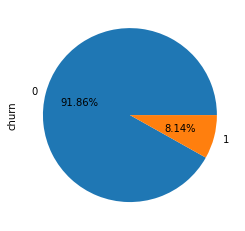

In [370]:
# lets find out churn/non churn percentage
((telecom_hvc_df['churn'].value_counts()/len(telecom_hvc_df))*100).plot.pie(autopct='%1.2f%%')
plt.show()

#### Observation
- 91.8% of customers do not churn

<b> There is clear class imbalance here which we need to address</b1>

<b>Delete columns that belong to the churn month (_9)</b>


In [371]:
churn_9_columns =  telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('_9')]
churn_9_columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9',
       'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],
      dtype='object')

In [372]:
telecom_hvc_df.drop(churn_9_columns,axis=1,inplace=True)

In [373]:
telecom_hvc_df.shape

(30001, 146)

In [374]:
# check missing value
check_missing_value(telecom_hvc_df)

,Number of NAN,% NAN
loc_ic_t2t_mou_8,1174,3.91
std_ic_t2m_mou_8,1174,3.91
og_others_8,1174,3.91
loc_ic_t2m_mou_8,1174,3.91
loc_og_t2c_mou_8,1174,3.91
std_og_t2t_mou_8,1174,3.91
loc_ic_t2f_mou_8,1174,3.91
loc_og_t2f_mou_8,1174,3.91
loc_ic_mou_8,1174,3.91
loc_og_t2m_mou_8,1174,3.91


In [375]:
telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('arpu')]


Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

## Step 6: EDA

### Univariate Analysis 

In [377]:
def box_plot(col_list):
    columns = 3
    rows = (len(col_list)//columns+1)
    
    if len(col_list) > 3:
        plt.figure(figsize=(16,12))
    else:
        plt.figure(figsize=(16,8))

    for i in list(enumerate(col_list)):
        plt.subplot(rows,columns,i[0]+1)
        sns.boxplot(x=i[1], data=telecom_hvc_df)
    plt.tight_layout(pad = 1)    
    plt.show()


def dist_plot(col_list):
    columns = 3
    rows = (len(col_list)//columns+1)
    
    if len(col_list) > 3:
        plt.figure(figsize=(16,12))
    else:
        plt.figure(figsize=(16,8))

    for i in list(enumerate(col_list)):
        plt.subplot(rows,columns,i[0]+1)
        sns.distplot(telecom_hvc_df[i[1]])
    plt.tight_layout(pad = 1)    
    plt.show()
    
def univariate_analysis(col_list):
    dist_plot(col_list)
    box_plot(col_list)

In [378]:
telecom_numeric.shape

(30001, 187)

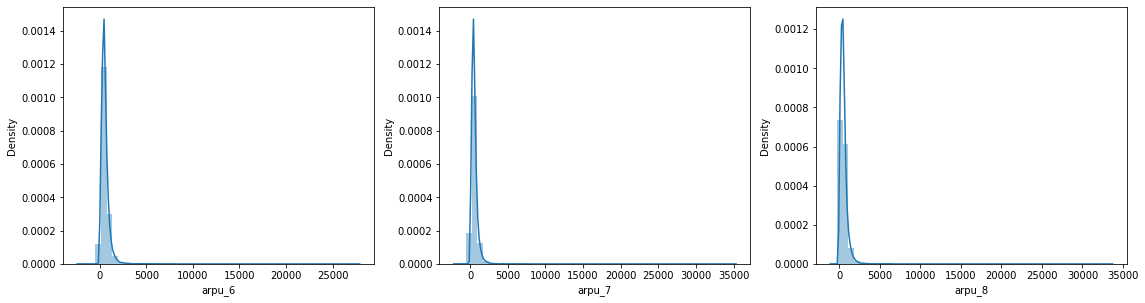

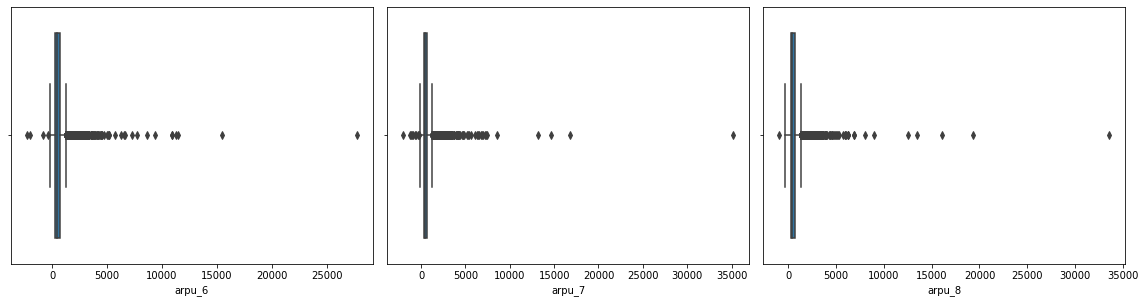

In [379]:
arp_cols = telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('arp')]
univariate_analysis(arp_cols)

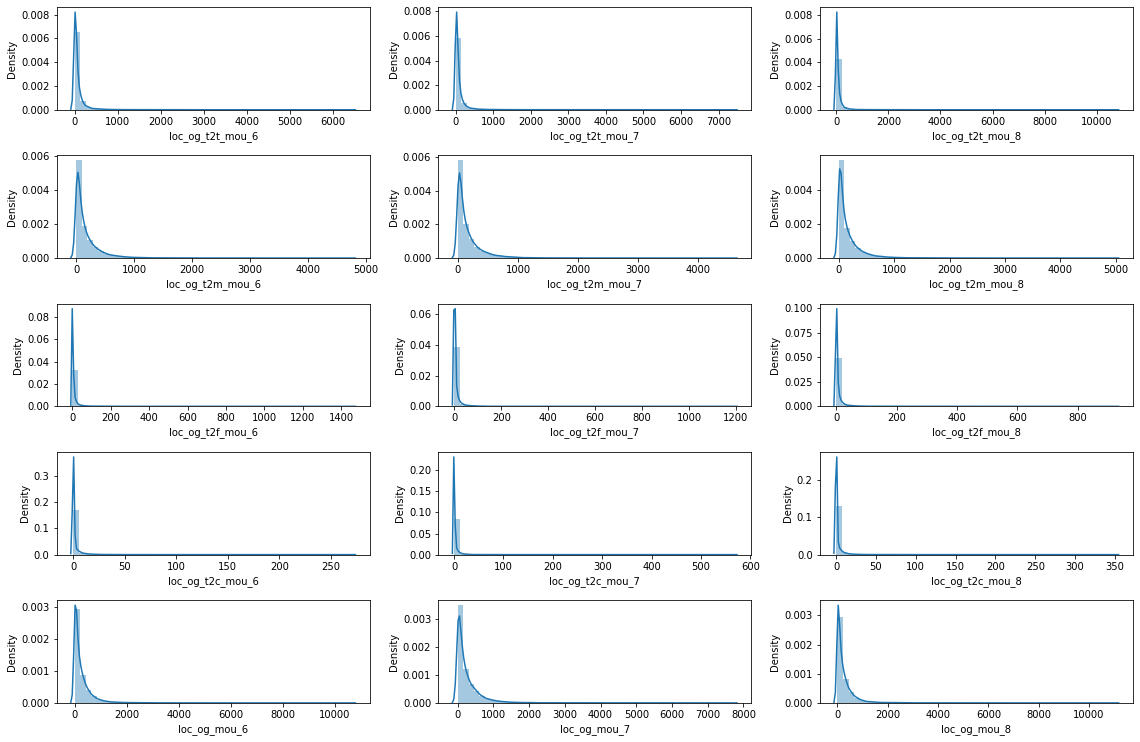

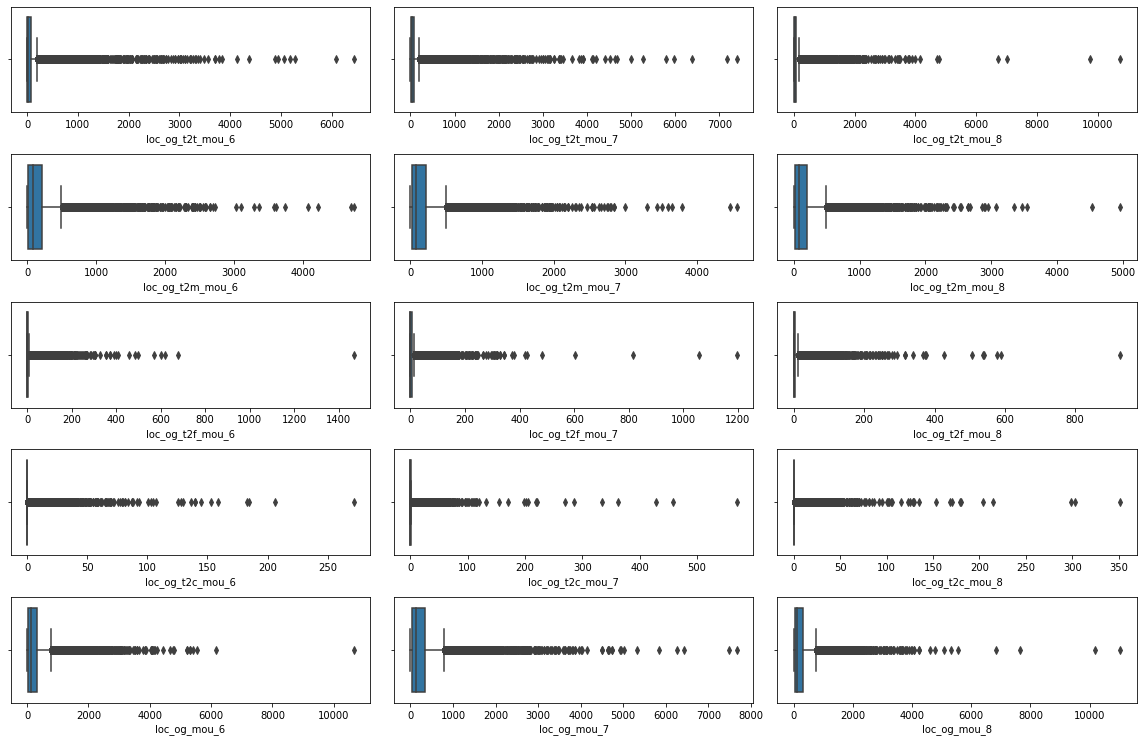

In [380]:
loc_og_cols = telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('loc_og')]
univariate_analysis(loc_og_cols)

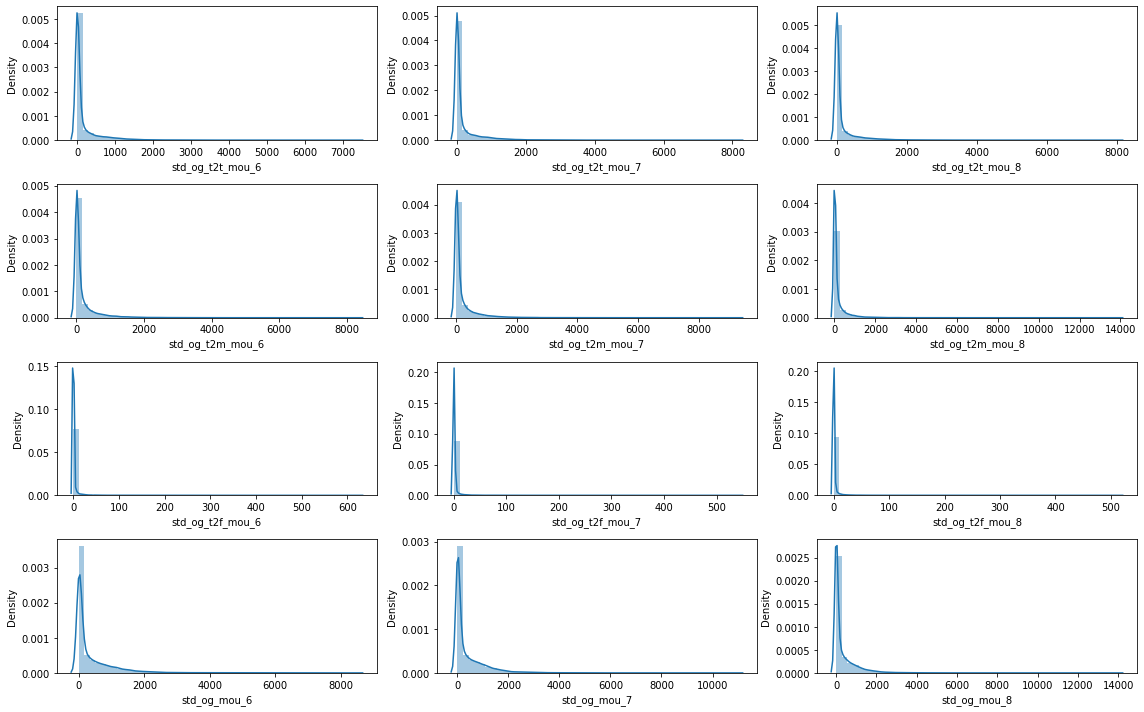

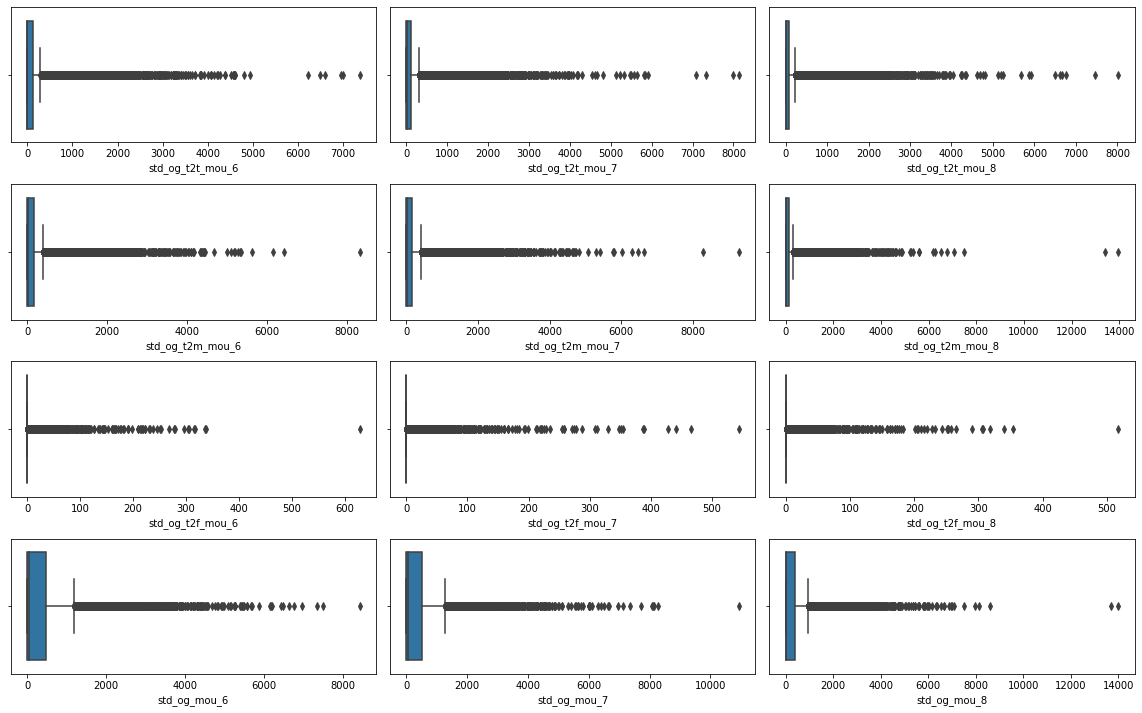

In [381]:
std_og_cols = telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('std_og')]
univariate_analysis(std_og_cols)

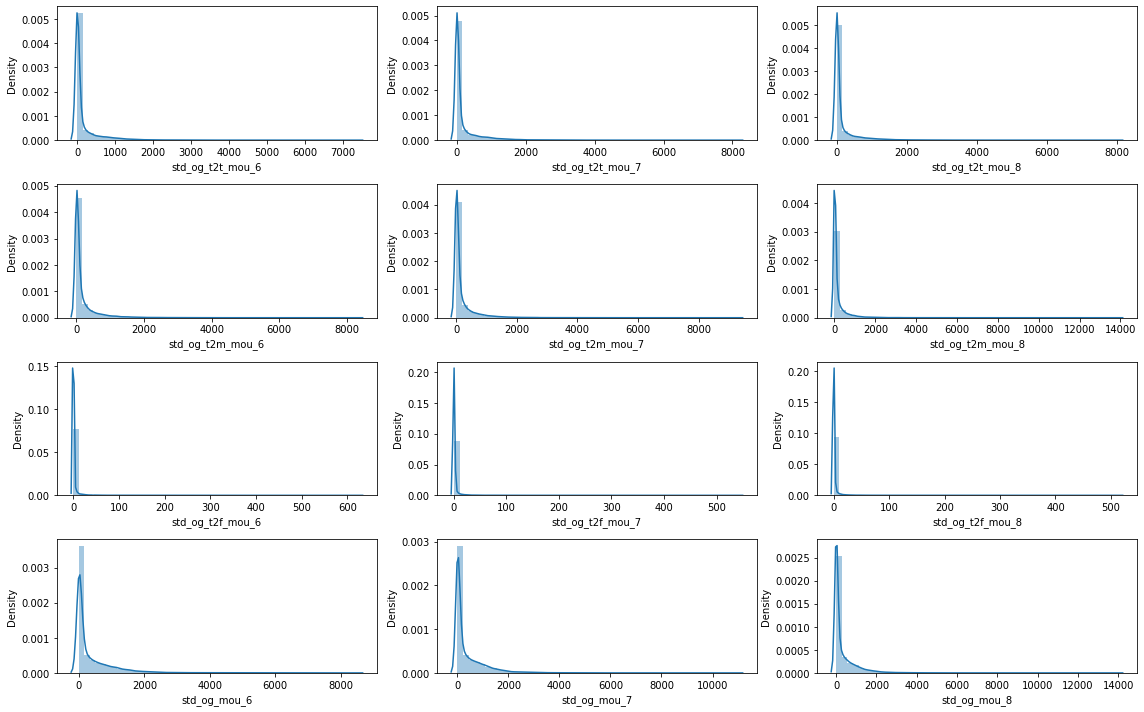

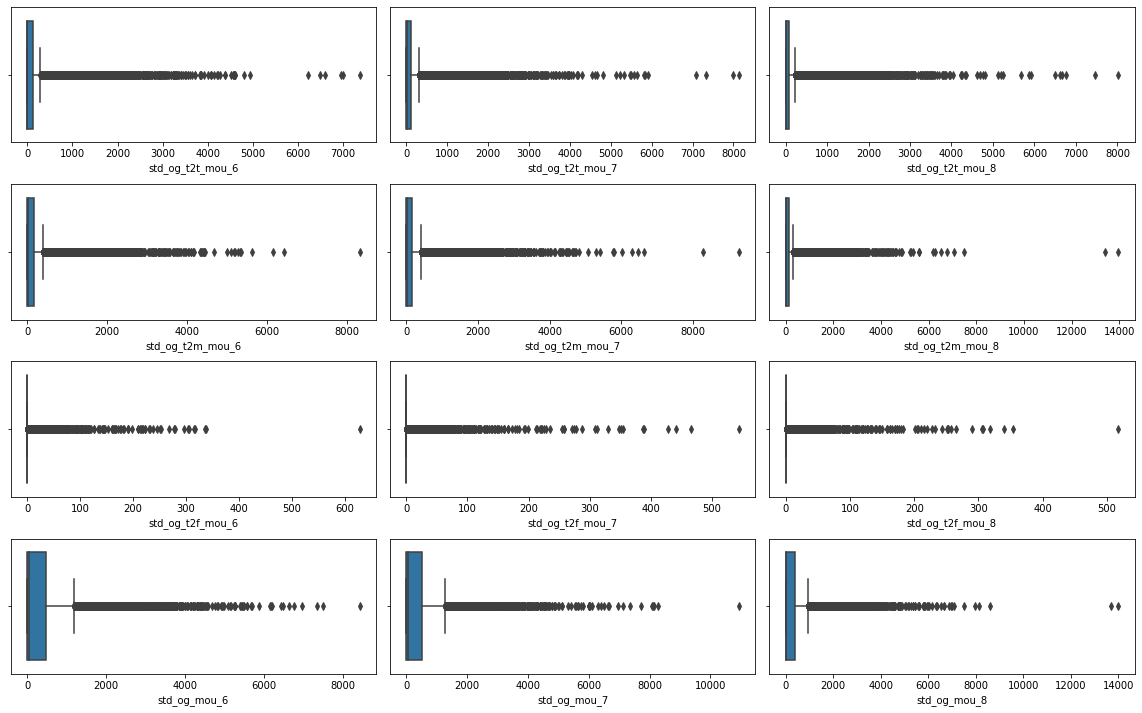

In [382]:
isd_og_cols = telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('isd_og')]
univariate_analysis(std_og_cols)

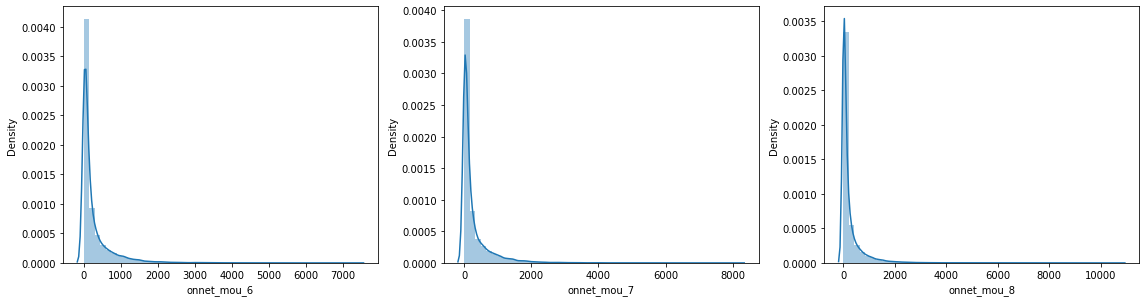

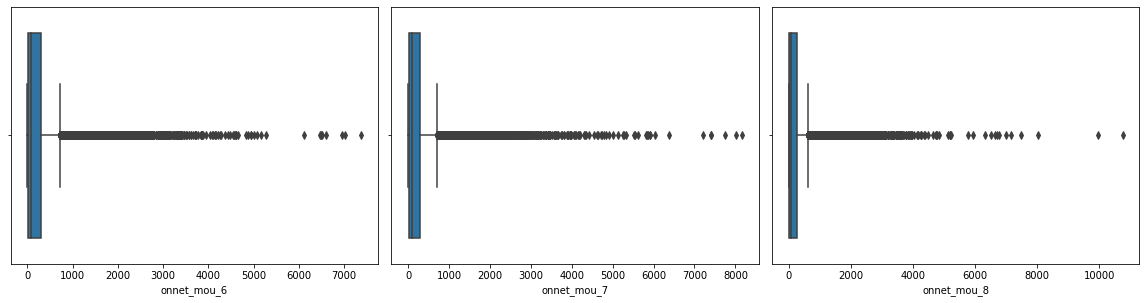

In [383]:
onnet_cols = telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('onnet')]
univariate_analysis(onnet_cols)

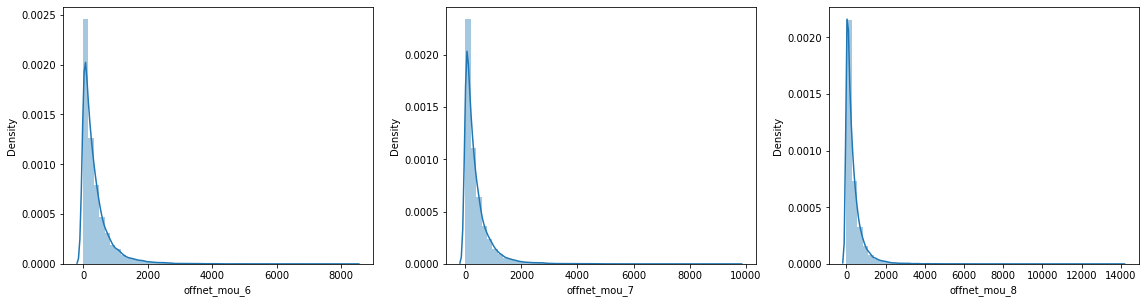

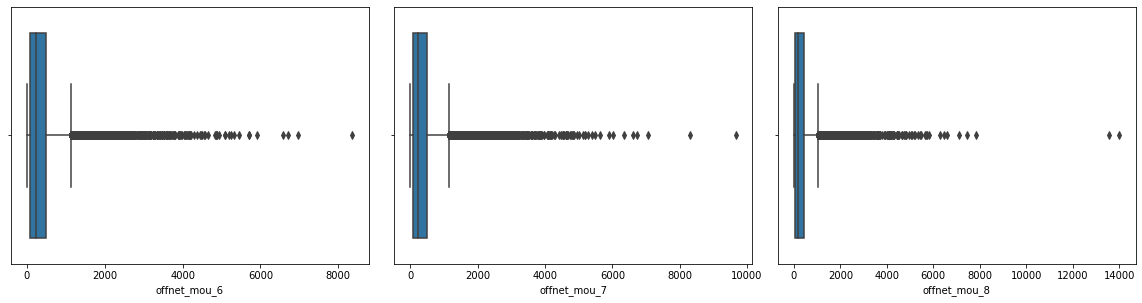

In [384]:
offnet_cols = telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('offnet')]
univariate_analysis(offnet_cols)

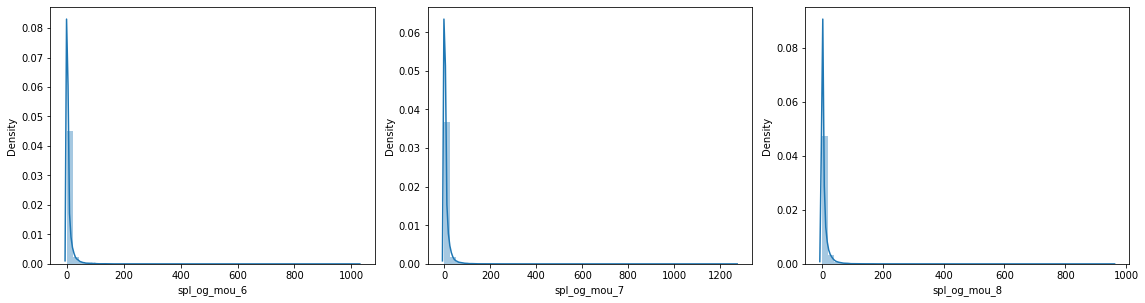

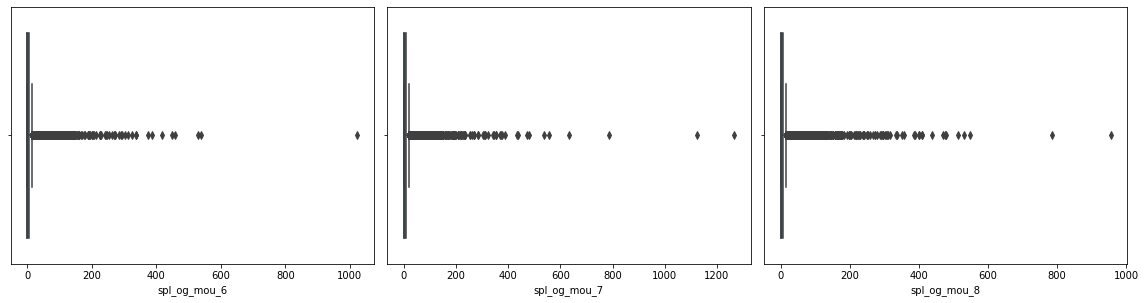

In [385]:
spl_og_cols =  telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('spl_og')]
univariate_analysis(spl_og_cols)

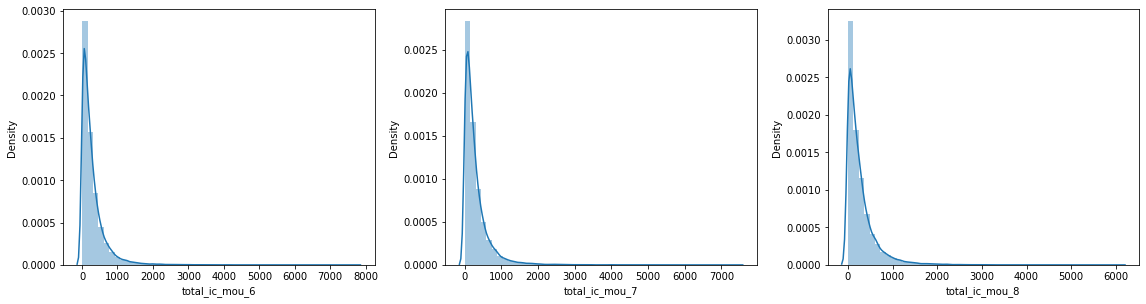

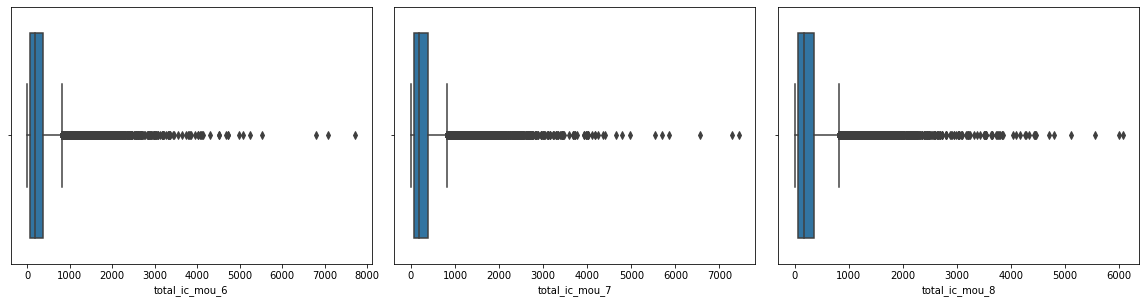

In [386]:
tot_ic_mou_cols =  telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('total_ic_mou')]
univariate_analysis(tot_ic_mou_cols)

### Observation

<b> All the datas are skewed and outliers are present in all the features</b><br>
<b> We will do outlier treatment post train test split</b>


### Bi Variate Analysis

### Recharge  amount related features v/s churn

In [387]:
recharge_amnt_columns =  telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'hvc_avg_rech_amt_6_7']

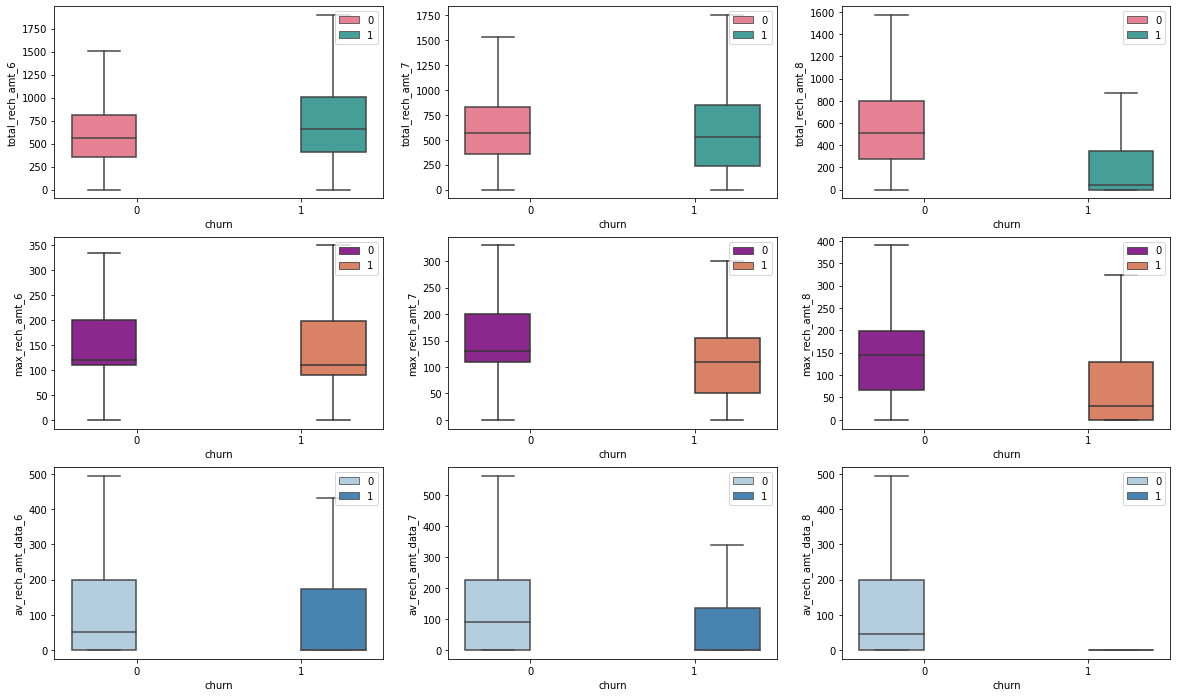

In [388]:
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.boxplot(data=telecom_hvc_df, y="total_rech_amt_6",x="churn",hue="churn", showfliers=False,palette=("husl"))
plt.legend(loc='upper right')
plt.subplot(3,3,2)
sns.boxplot(data=telecom_hvc_df, y="total_rech_amt_7",x="churn",hue="churn", showfliers=False,palette=("husl"))
plt.legend(loc='upper right')
plt.subplot(3,3,3)
sns.boxplot(data=telecom_hvc_df, y="total_rech_amt_8",x="churn",hue="churn", showfliers=False,palette=("husl"))
plt.legend(loc='upper right')


plt.subplot(3,3,4)
sns.boxplot(data=telecom_hvc_df, y="max_rech_amt_6",x="churn",hue="churn", showfliers=False,palette=("plasma"))
plt.legend(loc='upper right')
plt.subplot(3,3,5)
sns.boxplot(data=telecom_hvc_df, y="max_rech_amt_7",x="churn",hue="churn", showfliers=False,palette=("plasma"))
plt.legend(loc='upper right')
plt.subplot(3,3,6)
sns.boxplot(data=telecom_hvc_df, y="max_rech_amt_8",x="churn",hue="churn", showfliers=False,palette=("plasma"))
plt.legend(loc='upper right')

plt.subplot(3,3,7)
sns.boxplot(data=telecom_hvc_df, y="av_rech_amt_data_6",x="churn",hue="churn", showfliers=False,palette=("Blues"))
plt.legend(loc='upper right')
plt.subplot(3,3,8)
sns.boxplot(data=telecom_hvc_df, y="av_rech_amt_data_7",x="churn",hue="churn", showfliers=False,palette=("Blues"))
plt.legend(loc='upper right')
plt.subplot(3,3,9)
sns.boxplot(data=telecom_hvc_df, y="av_rech_amt_data_8",x="churn",hue="churn", showfliers=False,palette=("Blues"))
plt.legend(loc='upper right')

plt.show()

#### Observation
- There is drop seen on 8th month for all three features

### Total number of recharges  v/s churn

In [389]:
telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('rech_num')].to_list()


['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']

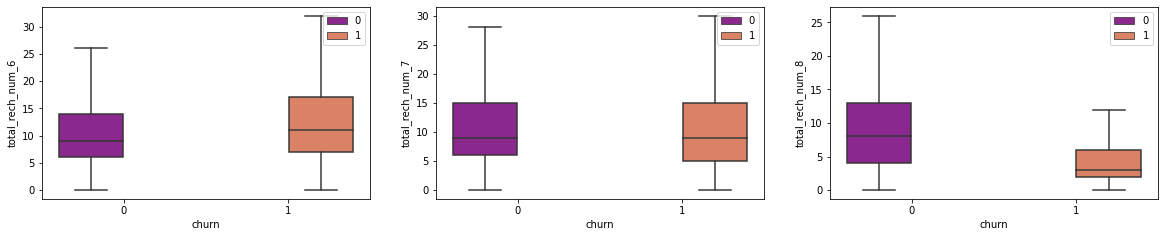

In [390]:
# sns.boxplot(data=telecom_hvc_df, y="total_rech_num_8",x="churn",hue="churn", showfliers=False,palette=("plasma"))
# plt.legend(loc='upper right')
# 
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(data=telecom_hvc_df, y="total_rech_num_6",x="churn",hue="churn", showfliers=False,palette=("plasma"))
plt.legend(loc='upper right')
plt.subplot(3,3,2)
sns.boxplot(data=telecom_hvc_df, y="total_rech_num_7",x="churn",hue="churn", showfliers=False,palette=("plasma"))
plt.legend(loc='upper right')
plt.subplot(3,3,3)
sns.boxplot(data=telecom_hvc_df, y="total_rech_num_8",x="churn",hue="churn", showfliers=False,palette=("plasma"))
plt.legend(loc='upper right')
plt.show()

#### Observation
- More churn number of recharges are less which is seen in 8th month

In [391]:
for i in range(6,9):
    print(telecom_hvc_df['total_rech_num_'+str(i)].describe())

count    30001.000000
mean     11.851005   
std      9.429132    
min      0.000000    
25%      6.000000    
50%      9.000000    
75%      15.000000   
max      307.000000  
Name: total_rech_num_6, dtype: float64
count    30001.000000
mean     11.718843   
std      9.432418    
min      0.000000    
25%      6.000000    
50%      9.000000    
75%      15.000000   
max      138.000000  
Name: total_rech_num_7, dtype: float64
count    30001.000000
mean     9.972868    
std      9.274370    
min      0.000000    
25%      4.000000    
50%      8.000000    
75%      13.000000   
max      196.000000  
Name: total_rech_num_8, dtype: float64


In [392]:
# Create bins
rech_num_bins = [-1, 0, 10, 15, 25, 350]
rech_num_labels = [ 'No recharge', '0-10 Recharges', '10-15 Recharges', '15-25 Recharges', '>25 Recharges']

telecom_hvc_df['total_rech_num_6_bins'] = pd.cut(telecom_hvc_df['total_rech_num_6'], rech_num_bins, labels=rech_num_labels)
telecom_hvc_df['total_rech_num_7_bins'] = pd.cut(telecom_hvc_df['total_rech_num_7'], rech_num_bins, labels=rech_num_labels)
telecom_hvc_df['total_rech_num_8_bins'] = pd.cut(telecom_hvc_df['total_rech_num_8'], rech_num_bins, labels=rech_num_labels)


In [393]:
# Print the percentage distribution 

print(100*(telecom_hvc_df['total_rech_num_6_bins'].value_counts()/telecom_hvc_df['total_rech_num_6_bins'].count()))
print(100*(telecom_hvc_df['total_rech_num_7_bins'].value_counts()/telecom_hvc_df['total_rech_num_7_bins'].count()))
print(100*(telecom_hvc_df['total_rech_num_8_bins'].value_counts()/telecom_hvc_df['total_rech_num_8_bins'].count()))

0-10 Recharges     56.784774
10-15 Recharges    20.685977
15-25 Recharges    15.142829
>25 Recharges      7.143095 
No recharge        0.243325 
Name: total_rech_num_6_bins, dtype: float64
0-10 Recharges     57.778074
10-15 Recharges    19.502683
15-25 Recharges    15.106163
>25 Recharges      7.286424 
No recharge        0.326656 
Name: total_rech_num_7_bins, dtype: float64
0-10 Recharges     64.494517
10-15 Recharges    15.786140
15-25 Recharges    11.696277
>25 Recharges      6.079797 
No recharge        1.943269 
Name: total_rech_num_8_bins, dtype: float64


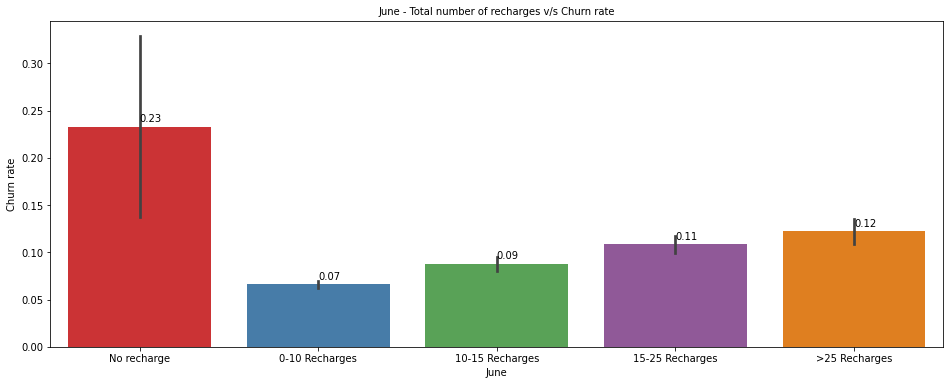

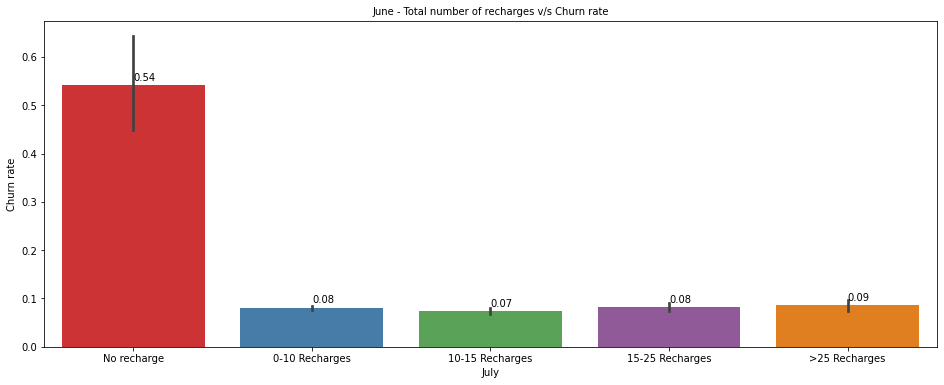

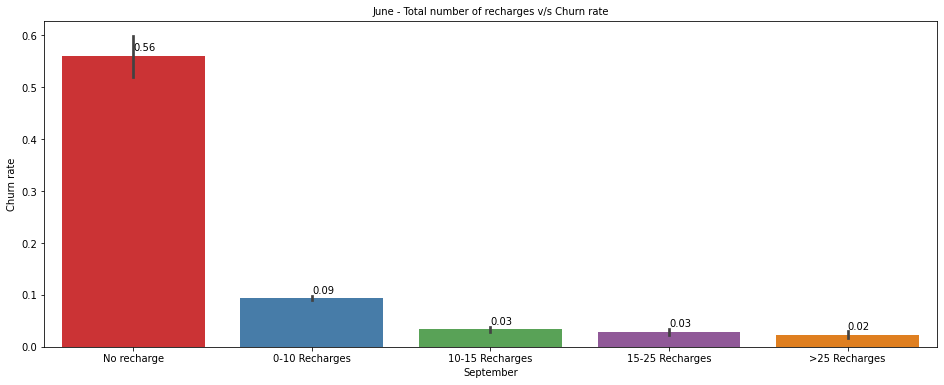

In [394]:
plot_bar_graph(telecom_hvc_df, x_axis="total_rech_num_6_bins", y_axis="churn",
               graph_title='June - Total number of recharges v/s Churn rate', x_axis_label='June',
               y_axis_label='Churn rate')

plot_bar_graph(telecom_hvc_df, x_axis="total_rech_num_7_bins", y_axis="churn",
               graph_title='June - Total number of recharges v/s Churn rate', x_axis_label='July',
               y_axis_label='Churn rate')

plot_bar_graph(telecom_hvc_df, x_axis="total_rech_num_8_bins", y_axis="churn",
               graph_title='June - Total number of recharges v/s Churn rate', x_axis_label='September',
               y_axis_label='Churn rate')

### Observation

- In the month of July and September the number of no recharges have gone to 54 - 56%


### Total recharges  v/s churn

In [395]:
telecom_hvc_df.columns[telecom_hvc_df.columns.str.contains('rech')].to_list()


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'hvc_avg_rech_amt_6_7',
 'total_rech_num_6_bins',
 'total_rech_num_7_bins',
 'total_rech_num_8_bins']

In [396]:
for i in range(6,9):
    print(telecom_hvc_df['total_rech_data_'+str(i)].describe())

count    30001.000000
mean     1.667711    
std      2.831233    
min      0.000000    
25%      0.000000    
50%      1.000000    
75%      2.000000    
max      61.000000   
Name: total_rech_data_6, dtype: float64
count    30001.000000
mean     1.853805    
std      3.091843    
min      0.000000    
25%      0.000000    
50%      1.000000    
75%      2.000000    
max      54.000000   
Name: total_rech_data_7, dtype: float64
count    30001.000000
mean     1.621913    
std      2.996010    
min      0.000000    
25%      0.000000    
50%      1.000000    
75%      2.000000    
max      60.000000   
Name: total_rech_data_8, dtype: float64


In [397]:
# Create bins
rech_data_bins = [-1, 0, 10, 15, 25, 70]
rech_data_labels = [ 'No recharge', '0-10 Recharges', '10-15 Recharges', '15-25 Recharges', '>25 Recharges']

telecom_hvc_df['total_rech_data_6_bins'] = pd.cut(telecom_hvc_df['total_rech_data_6'], rech_data_bins, labels=rech_data_labels)
telecom_hvc_df['total_rech_data_7_bins'] = pd.cut(telecom_hvc_df['total_rech_data_7'], rech_data_bins, labels=rech_data_labels)
telecom_hvc_df['total_rech_data_8_bins'] = pd.cut(telecom_hvc_df['total_rech_data_8'], rech_data_bins, labels=rech_data_labels)


In [398]:
# Print the percentage distribution 

print(100*(telecom_hvc_df['total_rech_data_6_bins'].value_counts()/telecom_hvc_df['total_rech_data_6_bins'].count()))
print(100*(telecom_hvc_df['total_rech_data_7_bins'].value_counts()/telecom_hvc_df['total_rech_data_7_bins'].count()))
print(100*(telecom_hvc_df['total_rech_data_8_bins'].value_counts()/telecom_hvc_df['total_rech_data_8_bins'].count()))

0-10 Recharges     53.824873
No recharge        44.148528
10-15 Recharges    1.493284 
15-25 Recharges    0.463318 
>25 Recharges      0.069998 
Name: total_rech_data_6_bins, dtype: float64
0-10 Recharges     54.391520
No recharge        43.145228
10-15 Recharges    1.826606 
15-25 Recharges    0.523316 
>25 Recharges      0.113330 
Name: total_rech_data_7_bins, dtype: float64
0-10 Recharges     51.021633
No recharge        46.825106
10-15 Recharges    1.566614 
15-25 Recharges    0.459985 
>25 Recharges      0.126662 
Name: total_rech_data_8_bins, dtype: float64


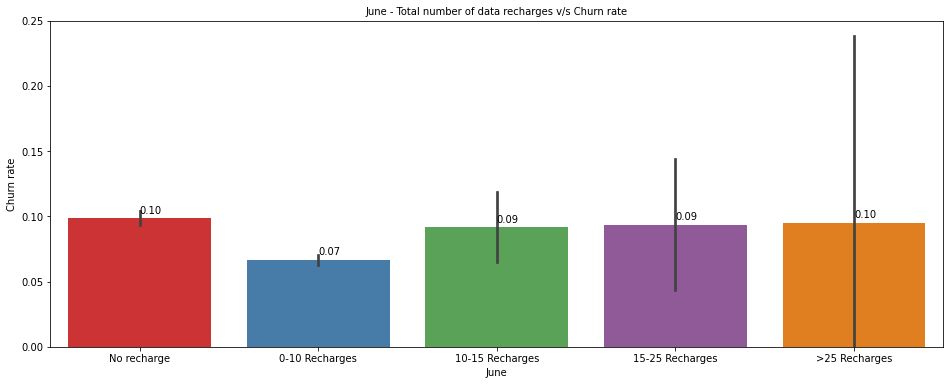

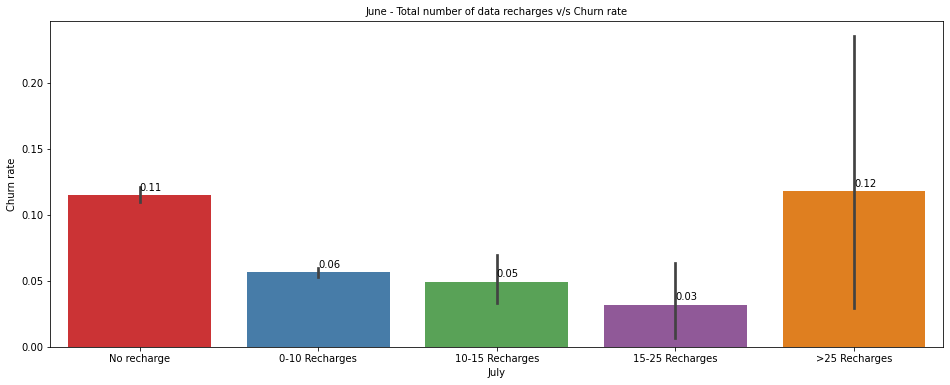

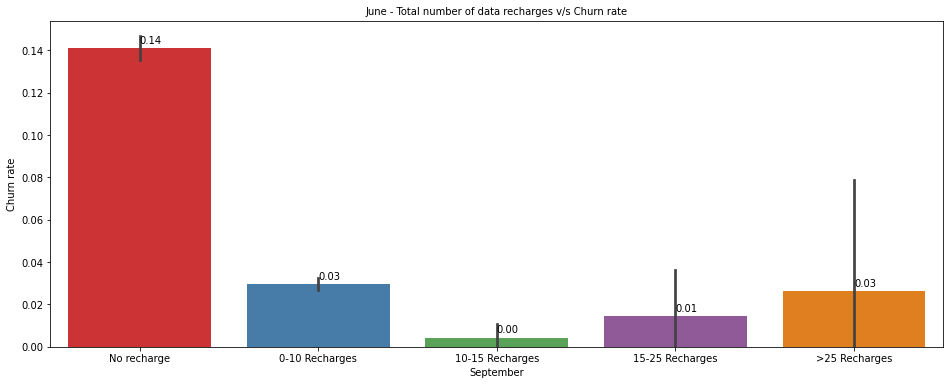

In [399]:
plot_bar_graph(telecom_hvc_df, x_axis="total_rech_data_6_bins", y_axis="churn",
               graph_title='June - Total number of data recharges v/s Churn rate', x_axis_label='June',
               y_axis_label='Churn rate')

plot_bar_graph(telecom_hvc_df, x_axis="total_rech_data_7_bins", y_axis="churn",
               graph_title='June - Total number of data recharges v/s Churn rate', x_axis_label='July',
               y_axis_label='Churn rate')

plot_bar_graph(telecom_hvc_df, x_axis="total_rech_data_8_bins", y_axis="churn",
               graph_title='June - Total number of data recharges v/s Churn rate', x_axis_label='September',
               y_axis_label='Churn rate')

### Age of network (tenure) v/s churn

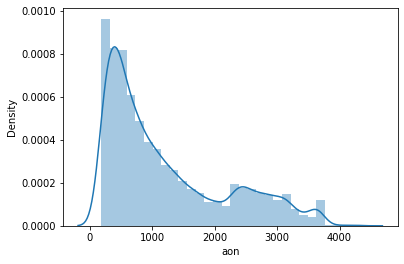

In [400]:
sns.distplot(telecom_hvc_df.aon,bins=30)
plt.show()

In [401]:
# creating a new variable 'tenure'
telecom_hvc_df['tenure'] = (telecom_hvc_df['aon']/30).round(0)

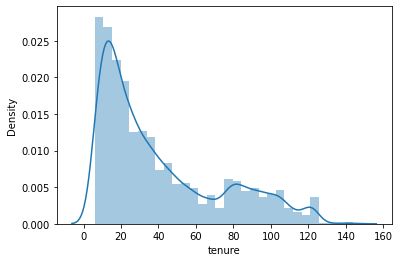

In [402]:
sns.distplot(telecom_hvc_df['tenure'],bins=30)
plt.show()

In [403]:
telecom_hvc_df.tenure.isnull().sum()

0

In [404]:
tenure_bins = [0, 6, 12, 24, 60, 61]
tenure_labels = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_hvc_df['tenure_bins'] = pd.cut(telecom_hvc_df['tenure'], tenure_bins, labels=tenure_labels)
telecom_hvc_df['tenure_bins'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_bins, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [405]:
print(100*(telecom_hvc_df['tenure_bins'].value_counts()/telecom_hvc_df['tenure_bins'].count()))

2-5 Yrs            40.991562
1-2 Yrs            34.053251
6-12 Months        22.218336
0-6 Months         2.251563 
5 Yrs and above    0.485288 
Name: tenure_bins, dtype: float64


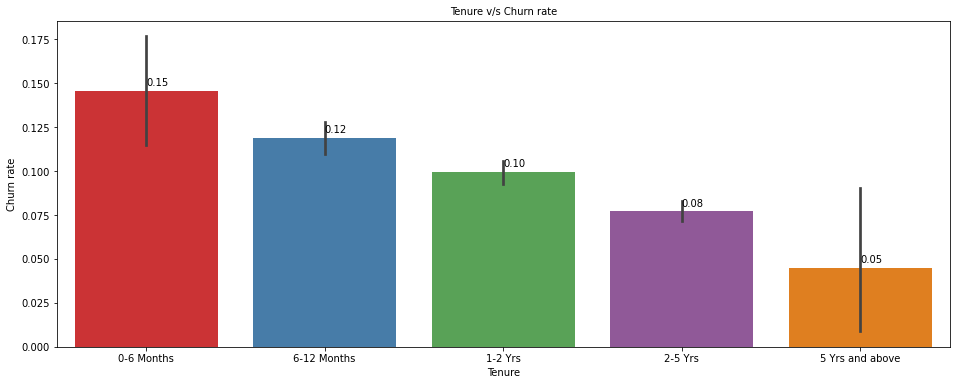

In [406]:
#plot_bar_graph(telecom_hvc_df, graph_title='Tenure v/s Churn rate', x_axis_label='Tenure',y_axis_label='Churn rate')
plot_bar_graph(telecom_hvc_df, x_axis="tenure_bins", y_axis="churn",
               graph_title='Tenure v/s Churn rate', x_axis_label='Tenure',y_axis_label='Churn rate')

#### Observation
- Churn rate is maximum from 0-6 Months tenure period which is around 15%

### Create Dummies

In [407]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
recharge_dummies = pd.get_dummies(telecom_hvc_df[['total_rech_num_6_bins','total_rech_num_7_bins','total_rech_num_8_bins',
                                       'total_rech_data_6_bins','total_rech_data_7_bins','total_rech_data_8_bins',
                                       'tenure_bins']], drop_first=True)
                                       
recharge_dummies.head()


,total_rech_num_6_bins_0-10 Recharges,total_rech_num_6_bins_10-15 Recharges,total_rech_num_6_bins_15-25 Recharges,total_rech_num_6_bins_>25 Recharges,total_rech_num_7_bins_0-10 Recharges,total_rech_num_7_bins_10-15 Recharges,total_rech_num_7_bins_15-25 Recharges,total_rech_num_7_bins_>25 Recharges,total_rech_num_8_bins_0-10 Recharges,total_rech_num_8_bins_10-15 Recharges,total_rech_num_8_bins_15-25 Recharges,total_rech_num_8_bins_>25 Recharges,total_rech_data_6_bins_0-10 Recharges,total_rech_data_6_bins_10-15 Recharges,total_rech_data_6_bins_15-25 Recharges,total_rech_data_6_bins_>25 Recharges,total_rech_data_7_bins_0-10 Recharges,total_rech_data_7_bins_10-15 Recharges,total_rech_data_7_bins_15-25 Recharges,total_rech_data_7_bins_>25 Recharges,total_rech_data_8_bins_0-10 Recharges,total_rech_data_8_bins_10-15 Recharges,total_rech_data_8_bins_15-25 Recharges,total_rech_data_8_bins_>25 Recharges,tenure_bins_6-12 Months,tenure_bins_1-2 Yrs,tenure_bins_2-5 Yrs,tenure_bins_5 Yrs and above
0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
21,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [408]:
telecom_hvc_df.shape

(30001, 154)

In [409]:
# Adding the results to the master dataframe
telecom_hvc_df = pd.concat([telecom_hvc_df, recharge_dummies], axis=1)
telecom_hvc_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,hvc_avg_rech_amt_6_7,churn,total_rech_num_6_bins,total_rech_num_7_bins,total_rech_num_8_bins,total_rech_data_6_bins,total_rech_data_7_bins,total_rech_data_8_bins,tenure,tenure_bins,total_rech_num_6_bins_0-10 Recharges,total_rech_num_6_bins_10-15 Recharges,total_rech_num_6_bins_15-25 Recharges,total_rech_num_6_bins_>25 Recharges,total_rech_num_7_bins_0-10 Recharges,total_rech_num_7_bins_10-15 Recharges,total_rech_num_7_bins_15-25 Recharges,total_rech_num_7_bins_>25 Recharges,total_rech_num_8_bins_0-10 Recharges,total_rech_num_8_bins_10-15 Recharges,total_rech_num_8_bins_15-25 Recharges,total_rech_num_8_bins_>25 Recharges,total_rech_data_6_bins_0-10 Recharges,total_rech_data_6_bins_10-15 Recharges,total_rech_data_6_bins_15-25 Recharges,total_rech_data_6_bins_>25 Recharges,total_rech_data_7_bins_0-10 Recharges,total_rech_data_7_bins_10-15 Recharges,total_rech_data_7_bins_15-25 Recharges,total_rech_data_7_bins_>25 Recharges,total_rech_data_8_bins_0-10 Recharges,total_rech_data_8_bins_10-15 Recharges,total_rech_data_8_bins_15-25 Recharges,total_rech_data_8_bins_>25 Recharges,tenure_bins_6-12 Months,tenure_bins_1-2 Yrs,tenure_bins_2-5 Yrs,tenure_bins_5 Yrs and above
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,559.0,1,0-10 Recharges,0-10 Recharges,0-10 Recharges,0-10 Recharg

In [410]:
telecom_hvc_df.shape

(30001, 182)

### Average Revenue v/s Churn

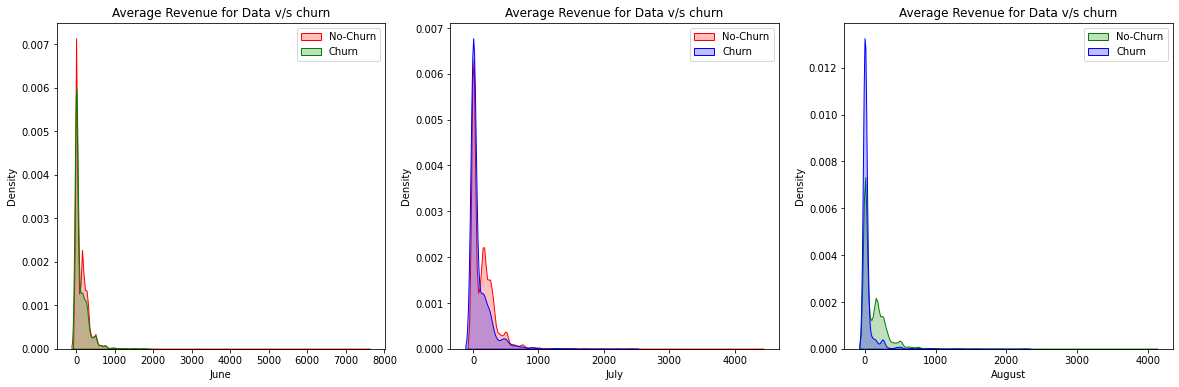

In [411]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
av_rech_kde = sns.kdeplot(telecom_hvc_df.av_rech_amt_data_6[(telecom_hvc_df["churn"] == 0)],
                color="Red", shade = True)
av_rech_kde = sns.kdeplot(telecom_hvc_df.av_rech_amt_data_6[(telecom_hvc_df["churn"] == 1)],
                ax =av_rech_kde, color="Green", shade= True)
av_rech_kde.legend(["No-Churn","Churn"],loc='upper right')
av_rech_kde.set_xlabel('June')
av_rech_kde.set_title('Average Revenue for Data v/s churn')


plt.subplot(1,3,2)
av_rech_kde_2 = sns.kdeplot(telecom_hvc_df.av_rech_amt_data_7[(telecom_hvc_df["churn"] == 0)],
                color="Red", shade = True)
av_rech_kde_2 = sns.kdeplot(telecom_hvc_df.av_rech_amt_data_7[(telecom_hvc_df["churn"] == 1)],
                ax =av_rech_kde_2, color="Blue", shade= True)
av_rech_kde_2.legend(["No-Churn","Churn"],loc='upper right')
av_rech_kde_2.set_xlabel('July')
av_rech_kde_2.set_title('Average Revenue for Data v/s churn')

plt.subplot(1,3,3)
av_rech_kde_3 = sns.kdeplot(telecom_hvc_df.av_rech_amt_data_8[(telecom_hvc_df["churn"] == 0)],
                color="Green", shade = True)
av_rech_kde_3 = sns.kdeplot(telecom_hvc_df.av_rech_amt_data_8[(telecom_hvc_df["churn"] == 1)],
                ax =av_rech_kde_3, color="Blue", shade= True)
av_rech_kde_3.legend(["No-Churn","Churn"],loc='upper right')
av_rech_kde_3.set_xlabel('August')
av_rech_kde_3.set_title('Average Revenue for Data v/s churn')
plt.show()


### Max Recharge v/s Churn


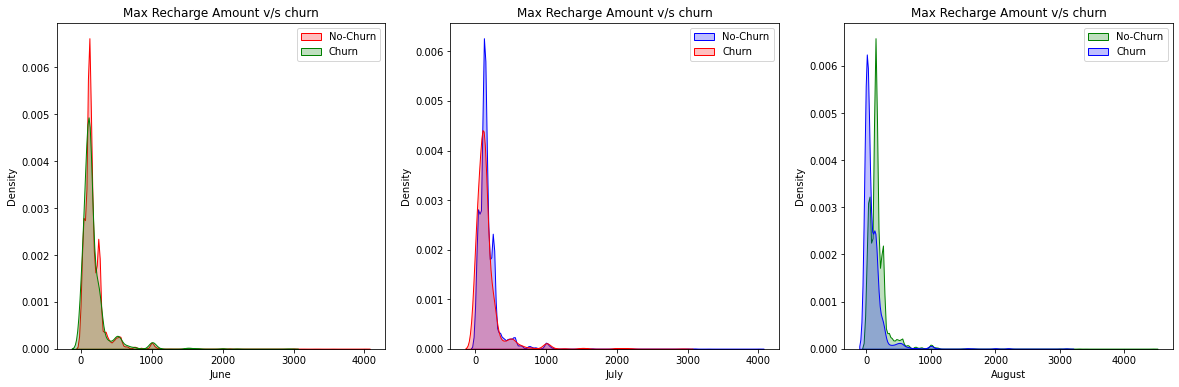

In [412]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
max_rech_kde = sns.kdeplot(telecom_hvc_df.max_rech_amt_6[(telecom_hvc_df["churn"] == 0)],
                color="Red", shade = True)
max_rech_kde = sns.kdeplot(telecom_hvc_df.max_rech_amt_6[(telecom_hvc_df["churn"] == 1)],
                ax =max_rech_kde, color="Green", shade= True)
max_rech_kde.legend(["No-Churn","Churn"],loc='upper right')
max_rech_kde.set_xlabel('June')
max_rech_kde.set_title('Max Recharge Amount v/s churn')

plt.subplot(1,3,2)
max_rech_kde = sns.kdeplot(telecom_hvc_df.max_rech_amt_7[(telecom_hvc_df["churn"] == 0)],
                color="Blue", shade = True)
max_rech_kde = sns.kdeplot(telecom_hvc_df.max_rech_amt_7[(telecom_hvc_df["churn"] == 1)],
                ax =max_rech_kde, color="Red", shade= True)
max_rech_kde.legend(["No-Churn","Churn"],loc='upper right')
max_rech_kde.set_xlabel('July')
max_rech_kde.set_title('Max Recharge Amount v/s churn')

plt.subplot(1,3,3)
max_rech_kde = sns.kdeplot(telecom_hvc_df.max_rech_amt_8[(telecom_hvc_df["churn"] == 0)],
                color="Green", shade = True)
max_rech_kde = sns.kdeplot(telecom_hvc_df.max_rech_amt_8[(telecom_hvc_df["churn"] == 1)],
                ax =max_rech_kde, color="Blue", shade= True)
max_rech_kde.legend(["No-Churn","Churn"],loc='upper right')
max_rech_kde.set_xlabel('August')
max_rech_kde.set_title('Max Recharge Amount v/s churn')

plt.show()

### Multivariate Analysis

### Check for correlation 

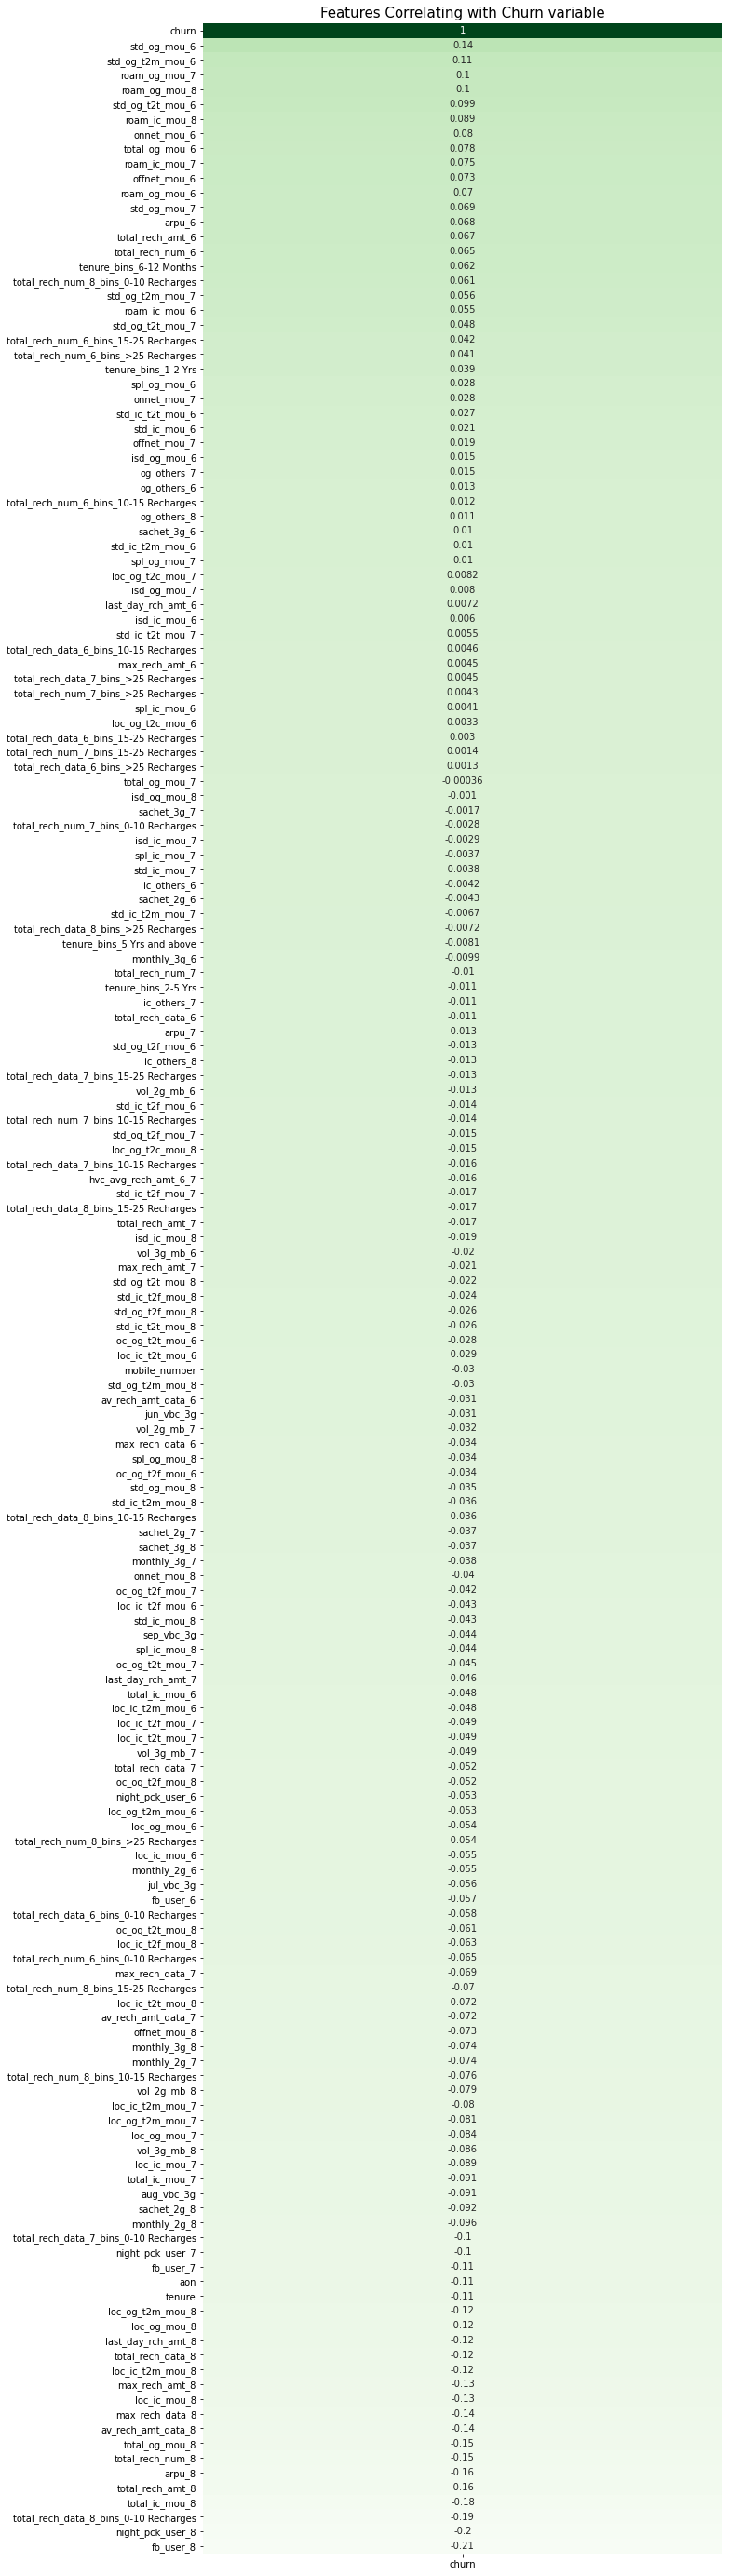

In [413]:
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_hvc_df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='Greens',cbar=False)
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)
plt.show()

In [414]:
# top_15_features = telecom_hvc_df.corr()['churn'][:].sort_values(ascending=False).head(16).keys()
# corr_15 = telecom_hvc_df[top_15_features].corr()
# plt.figure(figsize = (25, 16))
# heatmap_top_15 = sns.heatmap(corr_15, annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black',cmap="Reds")
# heatmap_top_15.set_title("Top 15 Features Correlating with Churn variable", fontsize=15)

# plt.show()

### Dropping all columns which is no more value addition

In [415]:
# Check the shape
print (telecom_hvc_df.shape)

# Since we dereived new column we will drop original feature
telecom_hvc_df.drop(['total_rech_num_6_bins','total_rech_num_7_bins','total_rech_num_8_bins',
                    'total_rech_data_6_bins','total_rech_data_7_bins','total_rech_data_8_bins',
                     'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                     'total_rech_num_6','total_rech_num_7','total_rech_num_8','aon','tenure',
                     'hvc_avg_rech_amt_6_7','tenure_bins','mobile_number','sep_vbc_3g'],axis=1, inplace=True)

# Confirm the change
print (telecom_hvc_df.shape)

(30001, 182)
(30001, 164)


In [416]:
telecom_hvc_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 164 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    arpu_6                                  float64
 1    arpu_7                                  float64
 2    arpu_8                                  float64
 3    onnet_mou_6                             float64
 4    onnet_mou_7                             float64
 5    onnet_mou_8                             float64
 6    offnet_mou_6                            float64
 7    offnet_mou_7                            float64
 8    offnet_mou_8                            float64
 9    roam_ic_mou_6                           float64
 10   roam_ic_mou_7                           float64
 11   roam_ic_mou_8                           float64
 12   roam_og_mou_6                           float64
 13   roam_og_mou_7                           float64
 14   roam_og_mou_8       

In [417]:
telecom_hvc_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,total_rech_num_6_bins_0-10 Recharges,total_rech_num_6_bins_10-15 Recharges,total_rech_num_6_bins_15-25 Recharges,total_rech_num_6_bins_>25 Recharges,total_rech_num_7_bins_0-10 Recharges,total_rech_num_7_bins_10-15 Recharges,total_rech_num_7_bins_15-25 Recharges,total_rech_num_7_bins_>25 Recharges,total_rech_num_8_bins_0-10 Recharges,total_rech_num_8_bins_10-15 Recharges,total_rech_num_8_bins_15-25 Recharges,total_rech_num_8_bins_>25 Recharges,total_rech_data_6_bins_0-10 Recharges,total_rech_data_6_bins_10-15 Recharges,total_rech_data_6_bins_15-25 Recharges,total_rech_data_6_bins_>25 Recharges,total_rech_data_7_bins_0-10 Recharges,total_rech_data_7_bins_10-15 Recharges,total_rech_data_7_bins_15-25 Recharges,total_rech_data_7_bins_>25 Recharges,total_rech_data_8_bins_0-10 Recharges,total_rech_data_8_bins_10-15 Recharges,total_rech_data_8_bins_15-25 Recharges,total_rech_data_8_bins_>25 Recharges,tenure_bins_6-12 Months,tenure_bins_1-2 Yrs,tenure_bins_2-5 Yrs,tenure_bins_5 Yrs and above
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,30.40,0.00,101.20,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39

## Step 7 : Train test split
- 1. Train Data set which is 70% of the data
- 2. Test Data set which is 30% of the data 

In [418]:
np.random.seed(0)
telecom_train, telecom_test = train_test_split(telecom_hvc_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [419]:
# confirm the split 
print (telecom_hvc_df.shape)
print (telecom_train.shape)
print (telecom_test.shape)

(30001, 164)
(21000, 164)
(9001, 164)


### Dividing Training sets into X and Y  for the model building

In [420]:
# divide into X_train, y_train
y_train = telecom_train.pop('churn')
X_train = telecom_train

y_test = telecom_test.pop('churn')
X_test = telecom_test

## Step 8: Missing value treatment on train data

In [421]:
check_missing_value(X_train)

,Number of NAN,% NAN
loc_og_t2m_mou_8,800,3.81
roam_og_mou_8,800,3.81
loc_ic_t2t_mou_8,800,3.81
og_others_8,800,3.81
loc_og_t2c_mou_8,800,3.81
loc_ic_t2m_mou_8,800,3.81
loc_ic_t2f_mou_8,800,3.81
loc_og_t2f_mou_8,800,3.81
std_og_t2t_mou_8,800,3.81
loc_ic_mou_8,800,3.81


In [422]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)

In [423]:
# Check for missing values
df_X_train = pd.DataFrame(imputed_X_train, columns = X_train.columns)
df_X_test = pd.DataFrame(imputed_X_test, columns = X_test.columns)

In [424]:
check_missing_value(df_X_train)

,Number of NAN,% NAN


In [425]:
check_missing_value(df_X_test)

,Number of NAN,% NAN


#### Observation
- Missing values is been treated